In [3]:
cd ../

C:\Users\rrrod


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('bmh') # for style

# reads the csv file
data = pd.read_csv(r"C:\Users\rrrod\FFC_4\Leusch_Stuff\RA_Sorted.csv")

# labels each column for use
df = pd.DataFrame(data, columns=["L", "B", "RA", "DEC", "Galactic_Index"])

print(df) # sanity check

         L     B          RA        DEC  Galactic_Index
0    124.4  20.0   23.851192  82.746098             168
1    124.4  23.4   32.778248  86.042542             169
2    129.0  20.0   52.084066  80.962227             180
3    133.6  20.0   69.006710  77.908980             192
4    129.0  23.4   69.993942  83.367395             181
..     ...   ...         ...        ...             ...
319  115.2  23.4  309.232324  82.078465             145
320  110.6  20.0  312.501293  76.649154             132
321  115.2  20.0  326.412516  79.953801             144
322  119.8  23.4  334.954938  85.318438             157
323  119.8  20.0  350.278198  82.316496             156

[324 rows x 5 columns]


In [5]:
# defines the function to extract galactic coordinates from the filename
def extract_coordinates(filename):
    parts = filename.split('_')
    galactic_i, galactic_b = None, None
    if len(parts) == 2:
        galactic_i = int(parts[0])
    elif len(parts) >= 3:
        galactic_i = int(parts[0]) # extracts the i value
        galactic_b = int(parts[1].split('.')[0]) # extracts b value
    return galactic_i, galactic_b

# defines the function to load data from .npz files
def load_data(folder_path):
    data = []
    filenames = os.listdir(folder_path)
    for filename in filenames:
        if filename.endswith('.npz'):
            filepath = os.path.join(folder_path, filename)
            try:
                npzfile = np.load(filepath)
                galactic_i, galactic_b = extract_coordinates(filename)
                data.append((galactic_i, galactic_b, npzfile['arr_0']))
            except Exception as e:
                print(f"Error loading file {filename}: {e}") # just in case no data is being loaded
    return data

# loads the csv file
data = pd.read_csv(r"C:\Users\rrrod\FFC_4\Leusch_Stuff\RA_Sorted.csv")

# loads the npz files from 
folder_path = r'C:\Users\rrrod\FFC_4\Leusch_Stuff'
npz_data = load_data(folder_path)

# iterates over each row in the DataFrame
for index, row in data.iterrows():
    L = row['L']
    B = row['B']
    RA = row['RA']
    DEC = row['DEC']
    galactic_index = row['Galactic_Index']

    # finds the corresponding npz data
    for galactic_i, galactic_b, arr in npz_data:
        if galactic_i == galactic_index:
            # Perform any desired operations here
            # For example, print the galactic coordinates and data shape
            print(f"Galactic Coordinates (L, B): ({L}, {B}), RA: {RA}, DEC: {DEC}, Data Shape: {arr.shape}")


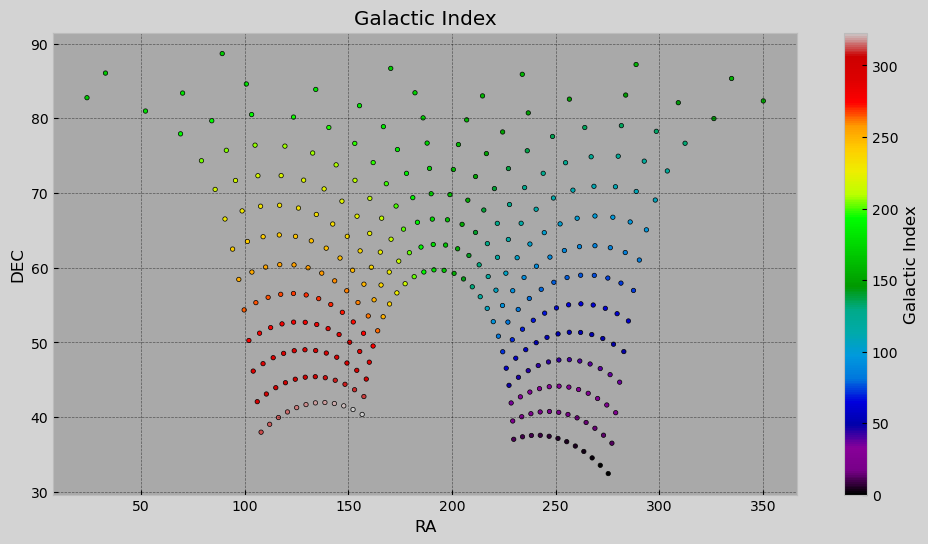

In [6]:
# extracts RA, DEC, and Galactic_Index columns from the DataFrame
RA = df['RA']
DEC = df['DEC']
Galactic_Index = df['Galactic_Index']

# plots that shit!
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('darkgray')  # sets facecolor
sc = ax.scatter(RA, DEC, s=10, c=Galactic_Index, cmap='nipy_spectral', edgecolor='k', lw=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Galactic Index')
plt.colorbar(sc, label='Galactic Index')
plt.grid(True, alpha=0.5, color='k')
plt.show()


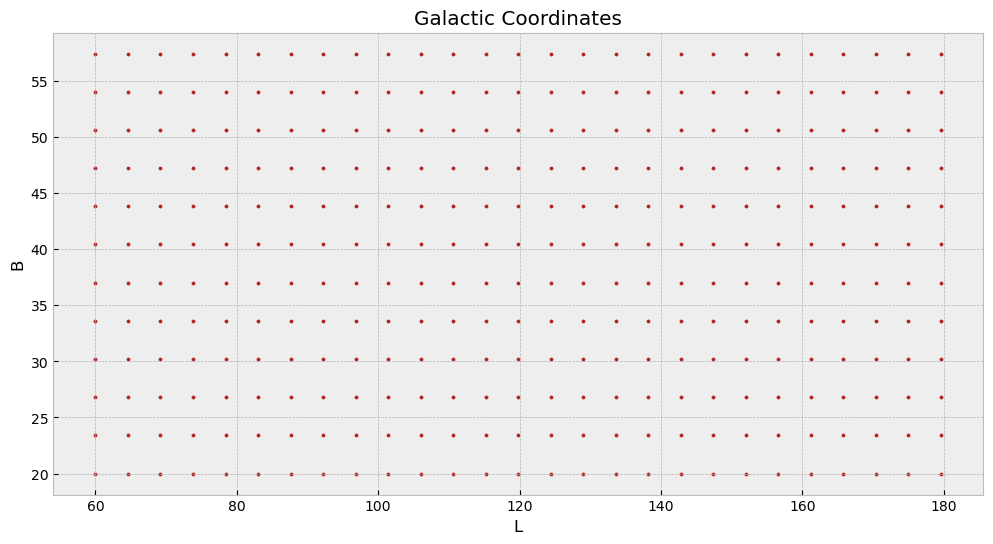

In [7]:
# extracts L and B columns from the DataFrame
L = df['L']
B = df['B']

# Plots this stuff
plt.figure(figsize=(12, 6))
plt.scatter(L, B, s=5, c='firebrick', alpha=1)
plt.xlabel('L')
plt.ylabel('B')
plt.title('Galactic Coordinates')
plt.grid(True)
plt.show()

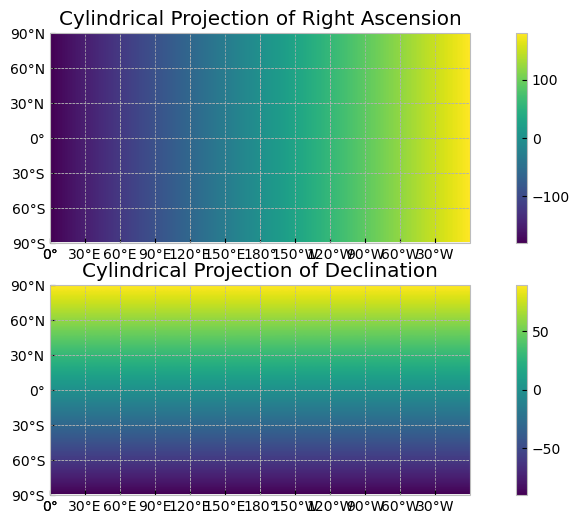

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

# Define the grid size
NLON, NLAT = 1000, 500
xs, ys = np.indices((NLAT, NLON))

# Convert indices to RA and DEC
ra = (ys - NLON / 2) * 360 / NLON  # Scale [0:NLON) to [-180:180) then shift to [0:360)
dec = (xs - NLAT / 2) * 180 / NLAT  # Scale [0:NLAT) to [-90:90)

# Set up matplotlib figure and axes using Cartopy
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(211, projection=ccrs.PlateCarree(central_longitude=180))
ax2 = plt.subplot(212, projection=ccrs.PlateCarree(central_longitude=180))

# Set titles
ax1.set_title('Cylindrical Projection of Right Ascension')
ax2.set_title('Cylindrical Projection of Declination')

# Configure the gridlines and formatting
for ax in [ax1, ax2]:
    ax.set_global()
    ax.set_xticks(np.arange(0, 361, 30), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.gridlines()

# Display the RA and DEC data
ax1.imshow(ra, origin='lower', extent=(0, 360, -90, 90), transform=ccrs.PlateCarree())
ax2.imshow(dec, origin='lower', extent=(0, 360, -90, 90), transform=ccrs.PlateCarree())

# Add color bars for each subplot
plt.colorbar(ax1.get_images()[0], ax=ax1, orientation='vertical')
plt.colorbar(ax2.get_images()[0], ax=ax2, orientation='vertical')

plt.show()
